# DIMENSION REDUCTION

## Đề Bài

Bài 1: 
- TÌm hiểu bộ dataset *load_digits* của sklearn.
- Tiến hành giảm chiều dữ liệu dựa trên phương pháp PCA, phân tích các principle components, tìm các features có vai trò quan trọng trong việc phân lớp digits.
- Áp dụng giảm chiều dữ liệu dựa trên phương pháp LDA, vẽ biểu đồ 2 chiều thể hiện việc phân cụm các digits giữa 2 phương pháp và so sánh kết quả.

Bài 2:
- Áp dụng stemming technique trong clean data *abc_news*.
- Áp dụng LDA huấn luyện ít nhất 100000 dòng để xây dựng topic modeling.
- Trích xuất ra vài topic và thử giải thích chủ đề của chúng, vẽ word cloud cho các topic giải thích.

## Bài Làm

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [25]:
# Load dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(digits.data.shape)

(1797, 64)


In [20]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [21]:
# Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

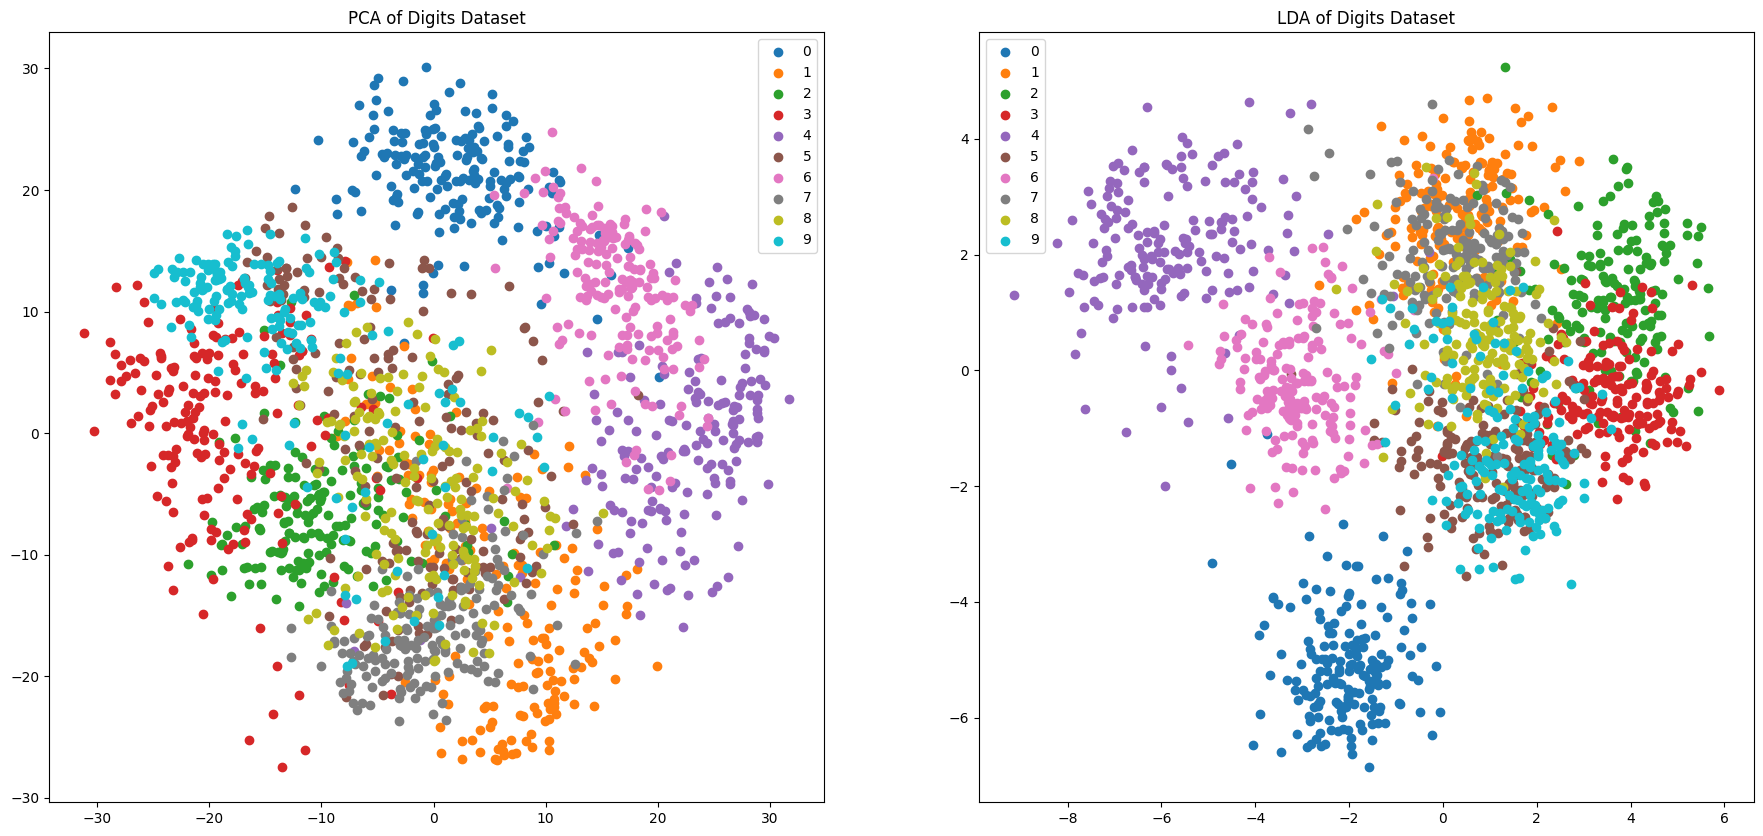

In [28]:
# Plotting PCA and LDA
fig, ax = plt.subplots(1, 2, figsize=(22, 10))

# PCA plot
for i in range(len(np.unique(y))):
    ax[0].scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=i)
ax[0].set_title('PCA of Digits Dataset')
ax[0].legend()

# LDA plot
for i in range(len(np.unique(y))):
    ax[1].scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=i)
ax[1].set_title('LDA of Digits Dataset')
ax[1].legend()
